In [1]:
# Classifying Iris Species

import pandas as pd
import mglearn
import numpy as np
import seaborn as sns;
from sklearn.datasets import load_iris
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load iris dataset
iris_dataset = load_iris()
# Information of dataset
#
print("Keys of iris dataset: \n", format(iris_dataset.keys()) + '\n')
# Short desciption dataset
#
print(iris_dataset['DESCR'])
# Path dataset file
#
#print(iris_dataset['filename'])
#print("Type of data: {}".format(type(iris_dataset['data'])))
#print("Type of data: {}".format(type(iris_dataset['target'])))

Keys of iris dataset: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    pet

In [3]:
# Create dataset table
df_data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df_target = pd.DataFrame(list(map(lambda x: iris_dataset['target_names'][x], iris_dataset.target)))
df_target.rename(columns={0:'result'}, inplace=True)
# Concat 2 table
df_concat = pd.concat([df_data, df_target], axis=1)
display(df_concat)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.utils.Bunch'>


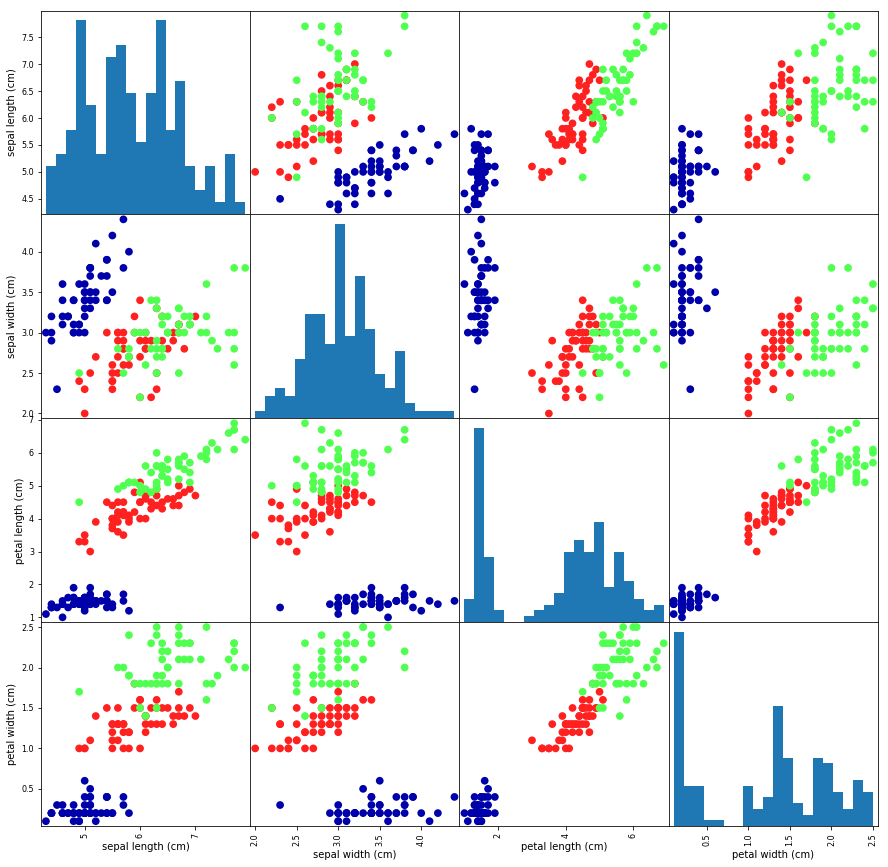

In [4]:
# Visualize dataset by a scatter plot matrix (histogram)
pd.plotting.scatter_matrix(df_data, c=iris_dataset.target, figsize=(15, 15),
                           marker='o', hist_kwds ={'bins': 20}, s=60,
                           alpha=1, cmap=mglearn.cm3)

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
print(format(type(iris)))
print(format(type(iris_dataset)))
#g = sns.pairplot(iris_dataset, hue="species")

In [24]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                        test_size=0.25, random_state=0, stratify = iris_dataset['target'])
print(np.var(y_train, ddof=1))
print(np.var(y_test, ddof=1))

0.6755952380952382
0.674964438122333


In [25]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [26]:
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97
